In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('./data/multivariate/samples.csv')
df.head(10)

,1,2,0,3,4
0,-0.838645,21.325169,-13.760162,83.649314,-816.154097
1,-7.560132,46.409737,4.455981,-21.607153,291.579509
2,12.046033,-86.445286,-11.586864,77.998772,-975.176512
3,1.816280,-14.390608,-9.989630,58.164448,-623.597257
4,10.951982,-70.927503,16.711708,-103.292970,979.593675
5,11.119433,-81.360841,-4.946288,29.121619,-453.571003
6,-0.476977,-7.333130,-5.876297,45.476737,-524.546552
7,3.234384,-16.941465,-1.532760,14.019815,-154.466295
8,3.450266,-33.527395,3.056361,-23.364527,171.328497
9,-2.213137,11.646368,5.958981,-44.690626,489.735222


In [3]:
graph = nx.read_gml("./data/multivariate/ground_truth.gml")
expected_edges = [(int(v1), int(v2)) for v1, v2 in list(graph.edges())]
expected_edges

[(0, 3), (0, 4), (1, 2), (1, 4), (2, 4), (3, 4)]

Identified 5 columns


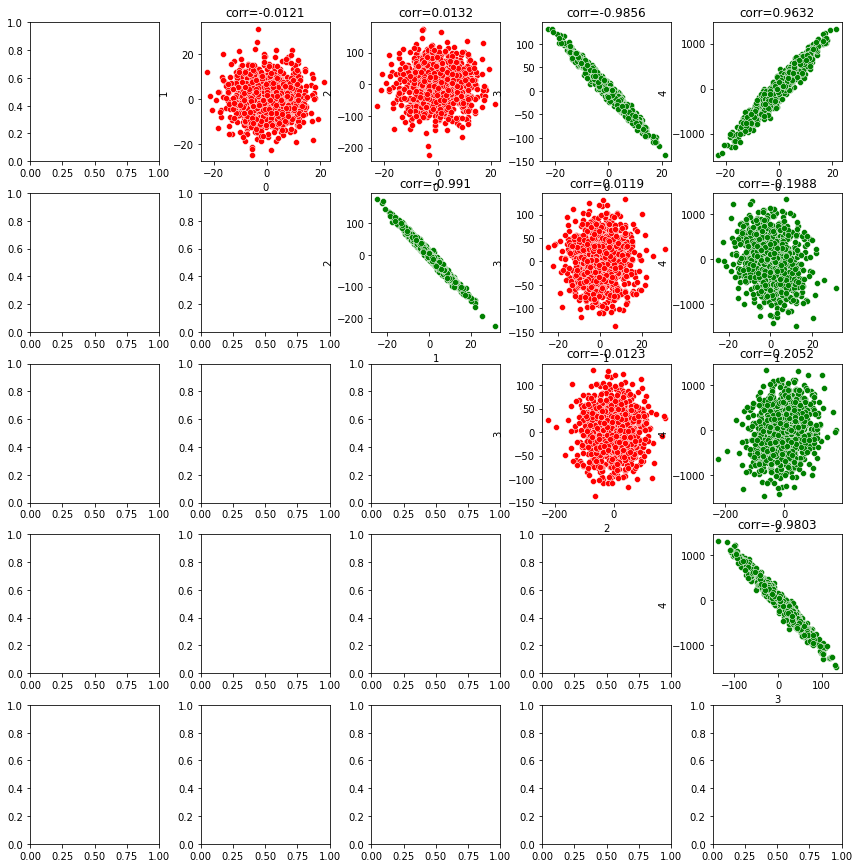

In [4]:
num_cols = len(df.columns)
print(f'Identified {num_cols} columns')

fig, ax = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(12,12))
fig.tight_layout()

for col1 in range(0, num_cols):
    for col2 in range(col1+1, num_cols):
        is_expected_edge = (col1, col2) in expected_edges
        color = 'green' if is_expected_edge else 'red'
        x, y = df[str(col1)], df[str(col2)]
        sns.scatterplot(x=x, y=y, ax=ax[col1, col2], color=color)
        corr = pearsonr(x=x, y=y)
        ax[col1, col2].title.set_text(f'corr={round(corr[0], 4)}')